In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots


df_errors = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/error_regions.csv', sep = ';')
df_org = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/merged.csv', sep = ';')

In [2]:
df = df_org.merge(df_errors, on = 'Data_Hora', how = 'inner')
df.head(3)

,Data_Hora,index,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,...,VelocidadeDoVento_0_error,VelocidadeDoVento_1_error,VelocidadeDoVento_2_error,VelocidadeDoVento_3_error,VelocidadeDoVento_4_error,Precipitacao_0_error,Precipitacao_1_error,Precipitacao_2_error,Precipitacao_3_error,Precipitacao_4_error
0,2011-01-01 00:00:00,0.0,84.8,920.6,20.2,22.8,17.5,NaN,0.0,137.0,...,False,False,False,False,True,False,False,False,False,False
1,2011-01-01 00:15:00,1.0,84.1,920.3,20.1,22.8,17.4,NaN,0.0,76.0,...,False,False,False,False,True,False,False,False,False,False
2,2011-01-01 00:30:00,2.0,83.9,920.2,20.1,22.9,17.2,NaN,0.0,92.0,...,False,False,False,False,True,False,False,False,False,False


# View Data

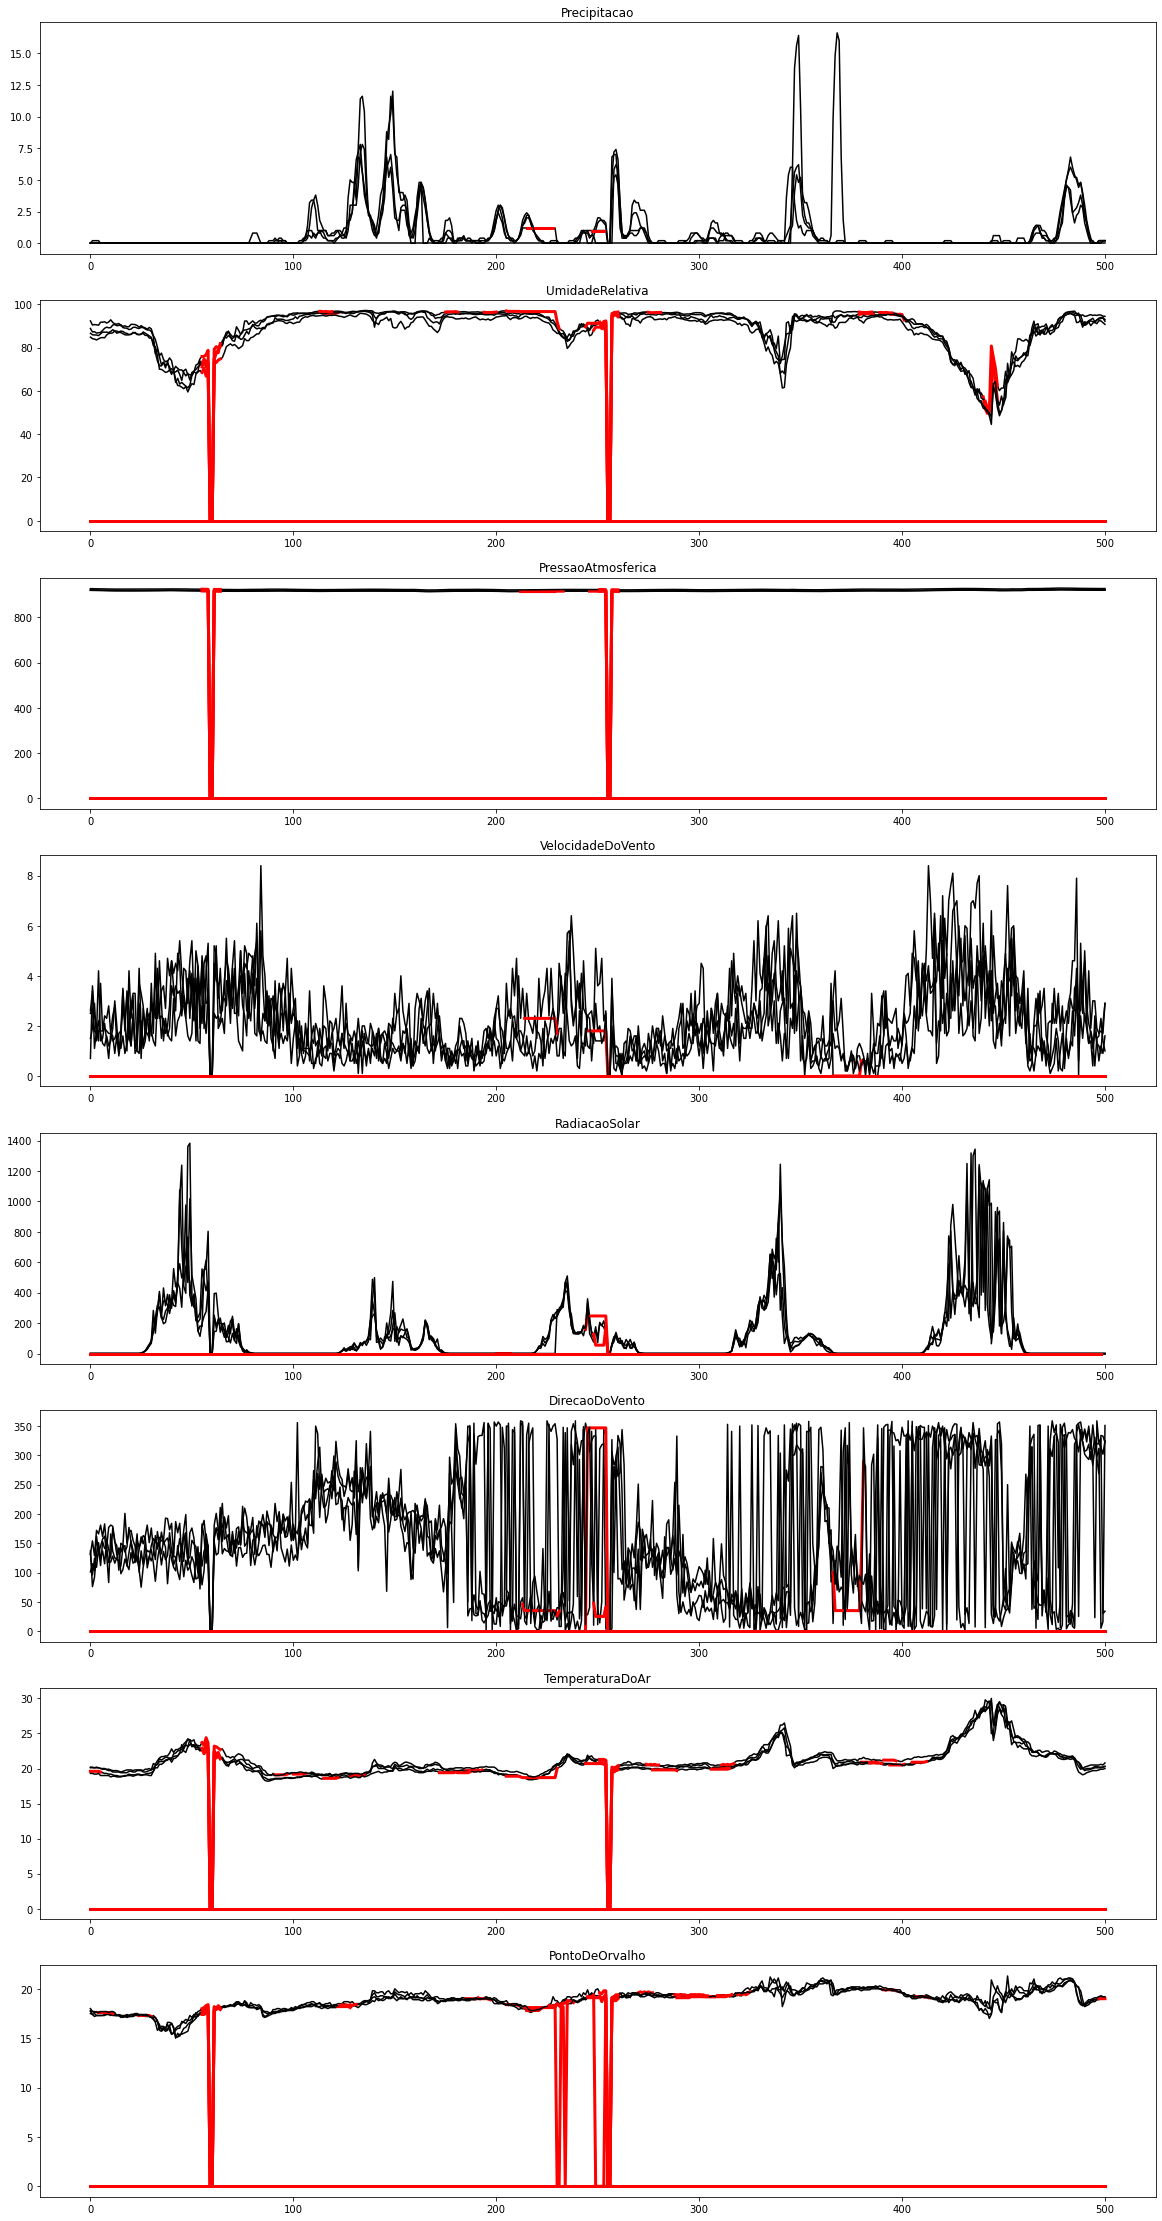

In [3]:
labels = list({c.split('_')[0] for c in df.columns if '_error'})
labels.remove('index')
labels.remove('Data')
labels.remove('Local')
labels.remove('SensacaoTermica')
labels.remove('TemperaturaInterna')

fig, ax = plt.subplots(len(labels), 1, figsize = (20, 5*len(labels)) )
ax = ax.ravel()

start, stop = 0, 500

for i, label in enumerate(labels):
    ax[i].set_title(label)
    for j in range(5):
        ax[i].plot(df.loc[start:stop, f'{label}_{j}'], c = 'k')
        ax[i].plot(df.loc[start:stop, f'{label}_{j}'].where(df[f'{label}_{j}_error']), c = 'r', lw = 3)
        
plt.show()

# Remove Errors
For the same feature remove all rows with Error

In [4]:
df_dict = {}

for label in labels:
    error_cols = [c for c in df.columns if '_error' in c and label in c]
    
    data_cols = [f'{label}_{i}' for i in range(5)]
    
    df_dict[label] = df.loc[df[error_cols].sum(axis = 1)  == 0, ['Data_Hora'] + data_cols ]

# Correlation

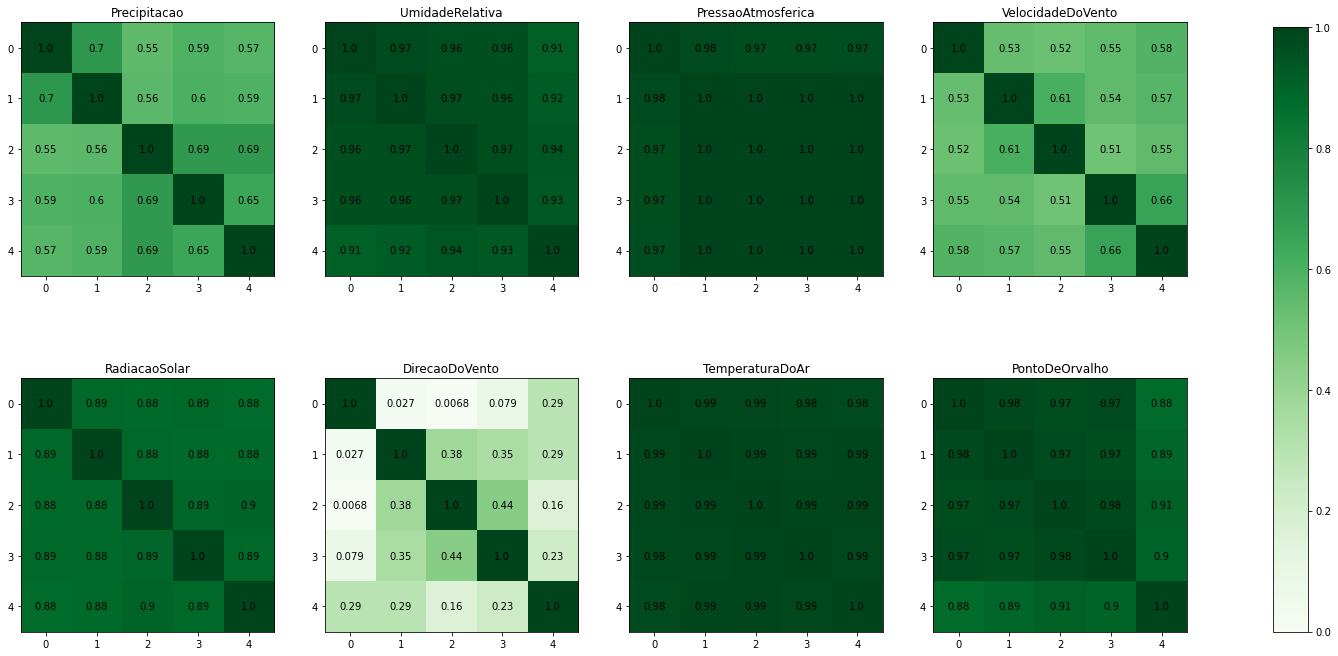

In [5]:
n = int(np.ceil(len(labels)/4))

fig, ax = plt.subplots( n , 4, figsize = (n*12, 12) )
ax = ax.ravel()

for i, label in enumerate(labels):
    img = ax[i].imshow(df_dict[label].corr(),  cmap=plt.get_cmap('Greens'))
    
    img.set_clim(0, 1)
        
    # Annotation
    ax[i].set_title(label)
    for a in range(len(df_dict[label].corr())):
        for b in range(len(df_dict[label].corr())):
            text = ax[i].text(a, b, '{:.2}'.format(df_dict[label].corr().values[a,b]),
                           ha="center", va="center", color="k")
# ColorBar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(img, cax=cbar_ax)

plt.show()